# 第7章原始程式碼:

Below are computational bases:


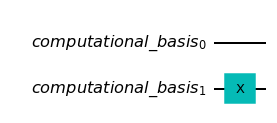

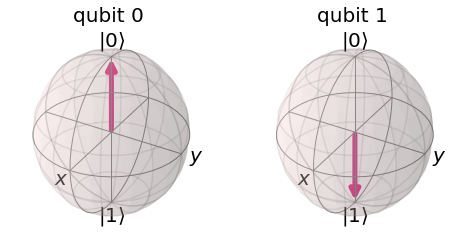

Below are Fourier bases:


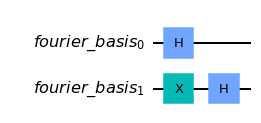

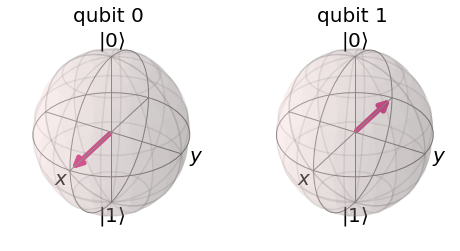

In [1]:
#Program 7.1 Show Bloch sphere for computational basis and Fourier basis
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
print('='*60,'\nBelow are computational bases:')
cb = QuantumRegister(2,'computational_basis')
qc1 = QuantumCircuit(cb)
qc1.x(1)
display(qc1.draw('mpl'))
state1 = Statevector.from_instruction(qc1)
display(state1.draw('bloch'))
print('='*60,'\nBelow are Fourier bases:')
fb = QuantumRegister(2,'fourier_basis')
qc2 = QuantumCircuit(fb)
qc2.x(1)
qc2.h([0,1])
display(qc2.draw('mpl'))
state2 = Statevector.from_instruction(qc2)
display(state2.draw('bloch'))

Below is the quantum Fourier transform (QFT) circuit:


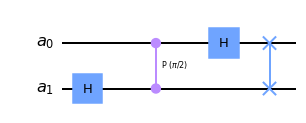

In [2]:
#Program 7.2 Build 2-qubit QFT quantum circuit
from qiskit import QuantumRegister, QuantumCircuit
from math import pi
ar = QuantumRegister(2,'a')
qc = QuantumCircuit(ar)
qc.h(1)
qc.cp(pi/2, 0, 1)
qc.h(0)
qc.swap(0,1)
print('Below is the quantum Fourier transform (QFT) circuit:')
display(qc.draw('mpl'))

Below is for qubits: q0 = 0 ; q1 = 0


<IPython.core.display.Latex object>

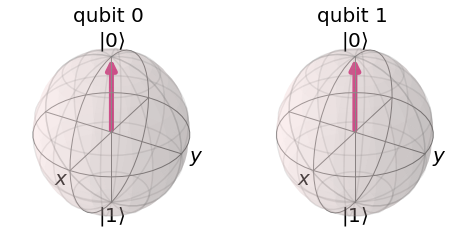

<IPython.core.display.Latex object>

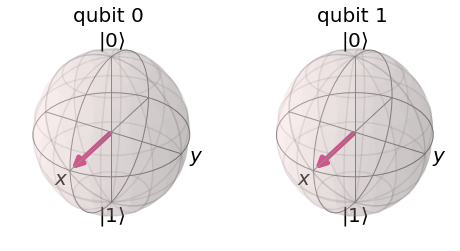

Below is for qubits: q0 = 0 ; q1 = 1


<IPython.core.display.Latex object>

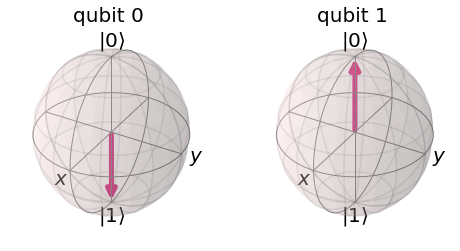

<IPython.core.display.Latex object>

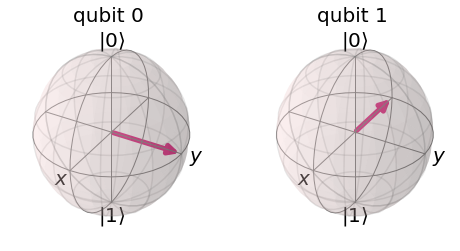

Below is for qubits: q0 = 1 ; q1 = 0


<IPython.core.display.Latex object>

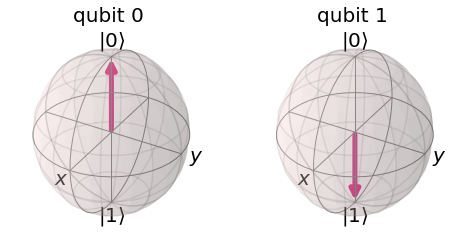

<IPython.core.display.Latex object>

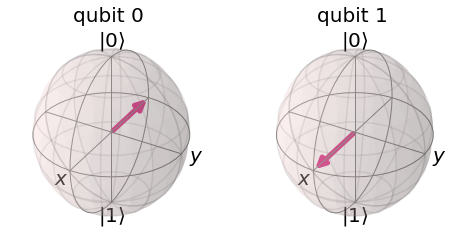

Below is for qubits: q0 = 1 ; q1 = 1


<IPython.core.display.Latex object>

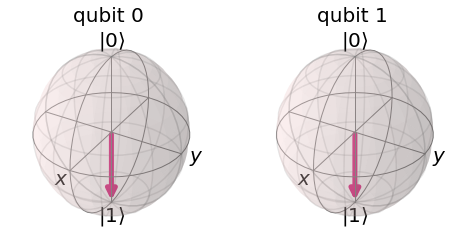

<IPython.core.display.Latex object>

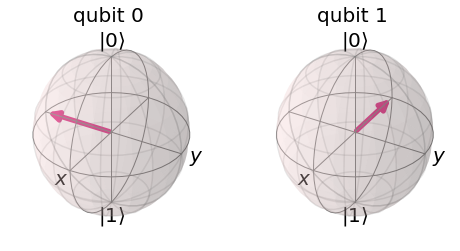

In [3]:
#Program 7.3 Apply QFT to qubit with various initial state
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from math import pi
two_bits = ['00','01','10','11']
for bits in two_bits: 
  ar = QuantumRegister(2,'a')
  qc = QuantumCircuit(ar)
  qc.initialize(bits,ar)  
  state1 = Statevector.from_instruction(qc)
  print('='*75,'\nBelow is for qubits: q0 =',bits[0],'; q1 =',bits[1])  
  display(array_to_latex(state1, prefix='\\text{Statevector before QFT: }'))
  display(state1.draw('bloch'))
  qc.h(1)
  qc.cp(pi/2, 0, 1)
  qc.h(0)
  qc.swap(0,1)
  state2 = Statevector.from_instruction(qc)
  #print('Below is the state after QFT')
  display(array_to_latex(state2, prefix='\\text{Statevector after QFT: }'))  
  display(state2.draw('bloch'))

Below is the QFT circuit of 1 qubit(s):


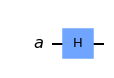

Below is the QFT circuit of 2 qubit(s):


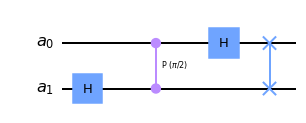

Below is the QFT circuit of 3 qubit(s):


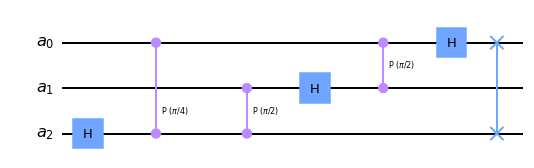

Below is the QFT circuit of 4 qubit(s):


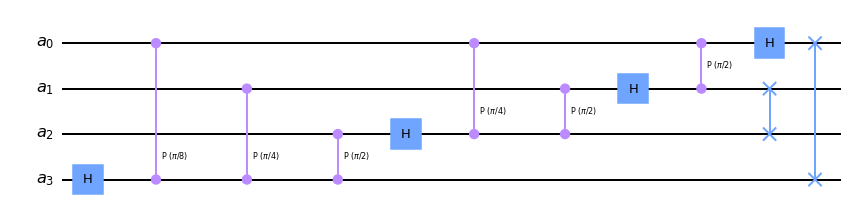

In [4]:
#Program 7.4 Define funciton to build n-qubit QFT quantum circuit
from qiskit import QuantumRegister, QuantumCircuit
from math import pi
def qft(n):
  ar = QuantumRegister(n,'a')
  qc = QuantumCircuit(ar)
  for hbit in range(n-1,-1,-1):
    qc.h(hbit) 
    for cbit in range(hbit):
      qc.cp(pi/2**(hbit-cbit), cbit, hbit)  
  for bit in range(n//2):
    qc.swap(bit,n-bit-1)  
  return qc  
for i in range(1,5):
  print('Below is the QFT circuit of',i,'qubit(s):') 
  display(qft(i).draw('mpl'))

Below is the IQFT circuit of 1 qubit(s):


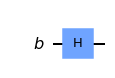

Below is the IQFT circuit of 2 qubit(s):


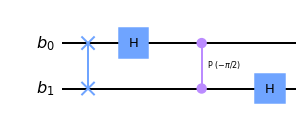

Below is the IQFT circuit of 3 qubit(s):


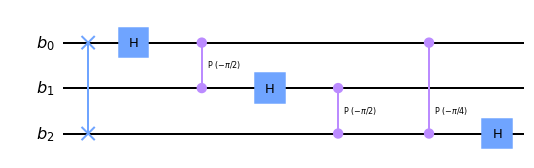

Below is the IQFT circuit of 4 qubit(s):


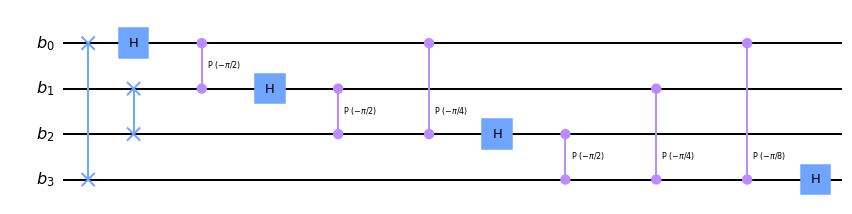

In [5]:
#Program 7.5 Define function to build n-qubit IQFT quantum circuit
from qiskit import QuantumRegister, QuantumCircuit
from math import pi
def iqft(n):
  br = QuantumRegister(n,'b')
  qc = QuantumCircuit(br)
  for sbit in range(n//2):       #sbit: for swap qubit
    qc.swap(sbit,n-sbit-1)  
  for hbit in range(0,n,1):      #hbit: for h-gate qubit
    for cbit in range(hbit-1,-1,-1):   #cbit: for count qubit
      qc.cp(-pi/2**(hbit-cbit), cbit, hbit)  
    qc.h(hbit) 
#  qc.name = "IQFT"  
  return qc
for i in range(1,5):
  print('Below is the IQFT circuit of',i,'qubit(s):') 
  display(iqft(i).draw('mpl'))

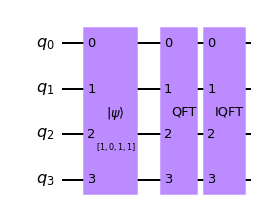

Statevector before QFT:


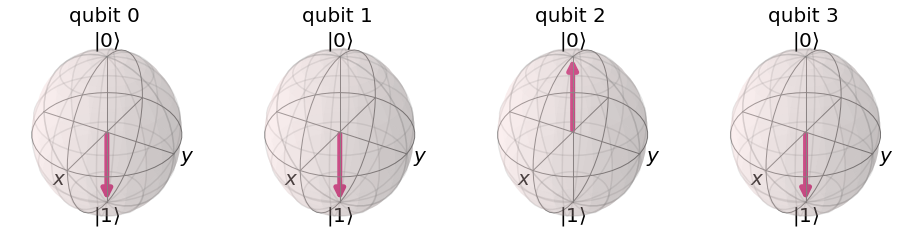

Statevector after QFT:


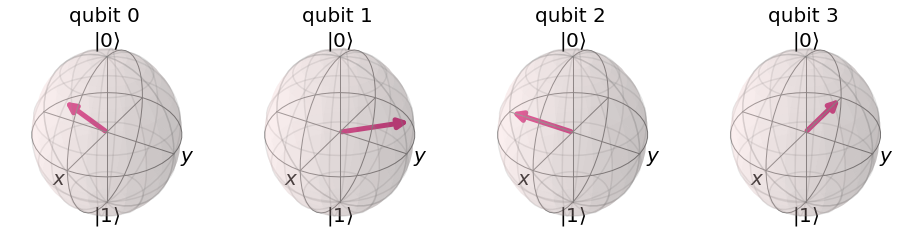

Statevector after IQFT:


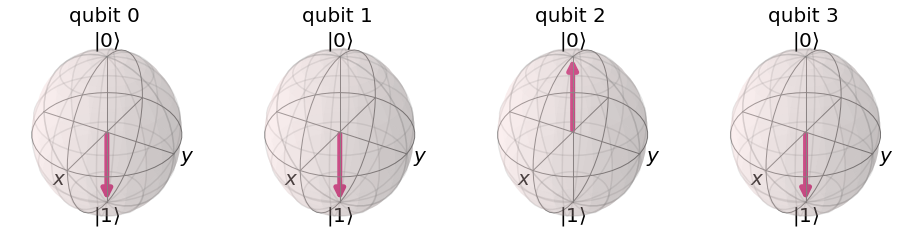

In [6]:
#Program 7.6 Apply QFT and then IQFT to qubit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(4)
qc.initialize('1011',range(4))
state0 = Statevector.from_instruction(qc)
qc.append(qft(4).to_gate(label='QFT'),range(4))
state1 = Statevector.from_instruction(qc)
qc.append(iqft(4).to_gate(label='IQFT'),range(4))
state2 = Statevector.from_instruction(qc)
display(qc.draw('mpl'))
print('Statevector before QFT:')
display(state0.draw('bloch'))
print('Statevector after QFT:')
display(state1.draw('bloch'))
print('Statevector after IQFT:')
display(state2.draw('bloch'))

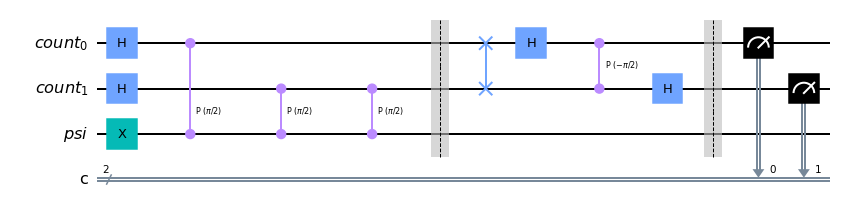

Total counts for qubit states are: {'01': 1000}


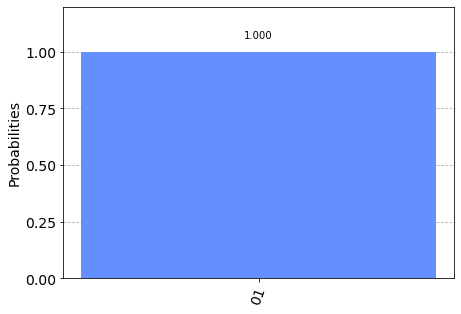

In [7]:
#Program 7.7 Use QPE to estimate phase of S-gate
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import pi
count_no = 2 #the number of count qubits
countreg = QuantumRegister(count_no,'count')
psireg = QuantumRegister(1,'psi')
creg = ClassicalRegister(count_no,'c')                     
qc = QuantumCircuit(countreg,psireg,creg)
for countbit in range(count_no):
  qc.h(countbit)
qc.x(psireg)
repeat = 1
for countbit in range(count_no):
  for r in range(repeat):
    qc.cp(pi/2,countbit,psireg)
  repeat *= 2
qc.barrier()
for sbit in range(count_no//2):       #sbit: for swap qubit
  qc.swap(sbit,count_no-sbit-1)  
for hbit in range(0,count_no,1):      #hbit: for h-gate qubit
  for cbit in range(hbit-1,-1,-1):    #cbit: for count qubit
    qc.cp(-pi/2**(hbit-cbit), cbit, hbit)  
  qc.h(hbit) 
qc.barrier()
qc.measure(range(count_no),range(count_no))  
display(qc.draw('mpl'))
sim = AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("Total counts for qubit states are:",counts)
plot_histogram(counts)

In [8]:
#Program 7.8 Classical Shor Algorithm
from random import randint
from math import gcd
def period_finding(a,N):
  for r in range(1,N):
    if (a**r) % N == 1:
      return r
def shor_alg(N):
  while True:
    a=randint(2,N-1)
    g=gcd(a,N)
    if g!=1:
      p=g
      q=N//g
      return p,q
    else:
      r=period_finding(a,N)  
      if r % 2 != 0:
        continue
      elif a**(r//2) % N == -1 % N:
        continue
      else:
        p=gcd(a**(r//2)+1,N)
        if p==1 or p==N:
          p=gcd(a**(r//2)-1,N)
        q=N//p
      return p,q
for N in [15, 21, 35, 913, 2257, 10999]:
  print(f'Factors of {N}: {shor_alg(N)}')

Factors of 15: (5, 3)
Factors of 21: (3, 7)
Factors of 35: (7, 5)
Factors of 913: (11, 83)
Factors of 2257: (37, 61)
Factors of 10999: (17, 647)


Below is the circuit of U of "2^2 mod 15":


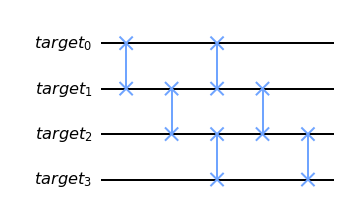

Below is the circuit of controlled U of "2^2 mod 15":


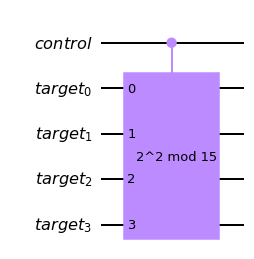

Below is the circuit of U of "4^2 mod 15":


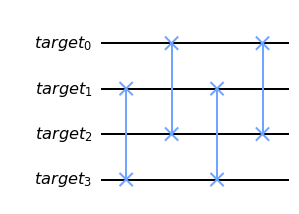

Below is the circuit of controlled U of "4^2 mod 15":


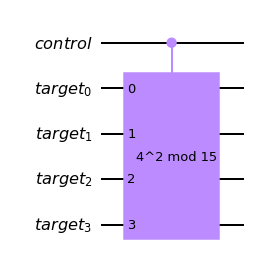

Below is the circuit of U of "7^2 mod 15":


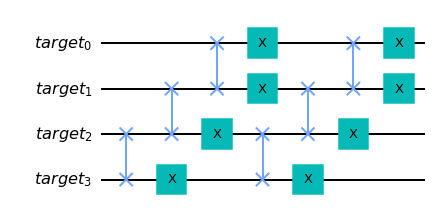

Below is the circuit of controlled U of "7^2 mod 15":


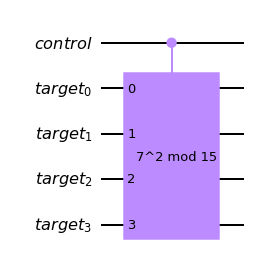

Below is the circuit of U of "8^2 mod 15":


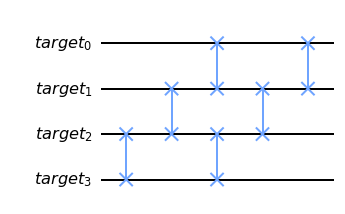

Below is the circuit of controlled U of "8^2 mod 15":


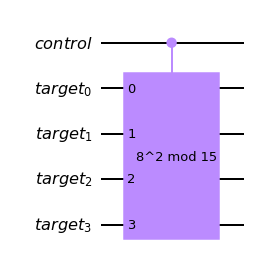

Below is the circuit of U of "11^2 mod 15":


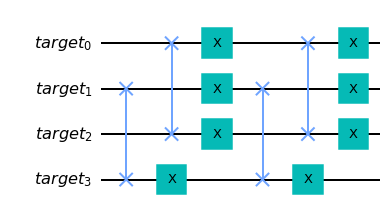

Below is the circuit of controlled U of "11^2 mod 15":


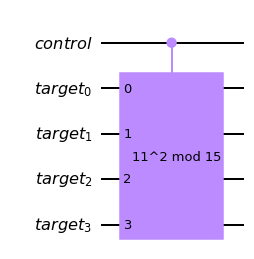

Below is the circuit of U of "13^2 mod 15":


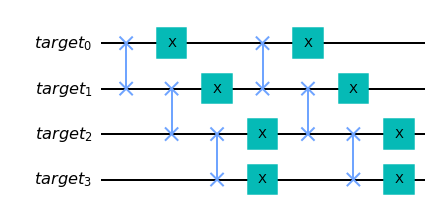

Below is the circuit of controlled U of "13^2 mod 15":


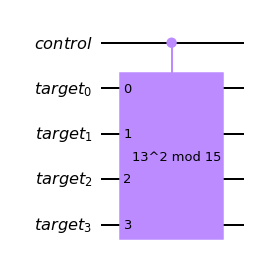

In [9]:
#Program 7.9 Define function to build modular exponentiation quantum circuit
from qiskit import QuantumRegister, QuantumCircuit
def qc_mod15(a, power, show=False):
  assert a in [2,4,7,8,11,13], 'Invalid value of argument a:'+str(a)
  qrt = QuantumRegister(4,'target')
  U = QuantumCircuit(qrt)        
  for i in range(power):
    if a in [2,13]:
      U.swap(0,1)
      U.swap(1,2)
      U.swap(2,3)
    if a in [7,8]:
      U.swap(2,3)
      U.swap(1,2)
      U.swap(0,1)
    if a in [4, 11]:
      U.swap(1,3)
      U.swap(0,2)
    if a in [7,11,13]:
      for j in range(4):
        U.x(j)
  if show:
    print('Below is the circuit of U of '+f'"{a}^{power} mod 15":') 
    display(U.draw('mpl'))
  U = U.to_gate()
  U.name = f'{a}^{power} mod 15'
  C_U = U.control()
  return C_U
power_arg=2
for a_arg in [2,4,7,8,11,13]:
  qrc = QuantumRegister(1,'control')
  qrt = QuantumRegister(4,'target')
  qc = QuantumCircuit(qrc,qrt)
  qc.append(qc_mod15(a_arg, power_arg, show=True),[0,1,2,3,4])
  print('Below is the circuit of controlled U of '+f'"{a_arg}^{power_arg} mod 15":')
  display(qc.draw('mpl'))

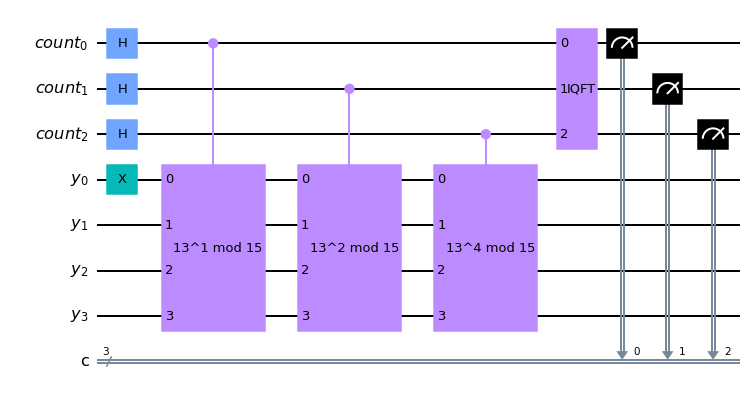

In [10]:
#Program 7.10: Define quantum period finding function with N=15
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit
def qpf15(count_no,a):
  qrc = QuantumRegister(count_no,'count')
  qry = QuantumRegister(4,'y') #for input of qc_mod15 gate 
  clr = ClassicalRegister(count_no,'c')  
  qc = QuantumCircuit(qrc, qry, clr) 
  for cbit in range(count_no):
    qc.h(cbit)
  qc.x(qry[0]) #Set the input of qc_mod15 as |1> with y0 as LSB
  for cbit in range(count_no):   #Add controlled-qc_mod15 gates
    qc.append(qc_mod15(a, 2**cbit), [cbit] + list(range(count_no, count_no+4)))
  qc.append(iqft(count_no).to_gate(label='IQFT'), range(count_no))
  qc.measure(range(count_no), range(count_no))
  return qc
display(qpf15(count_no=3,a=13).draw('mpl'))

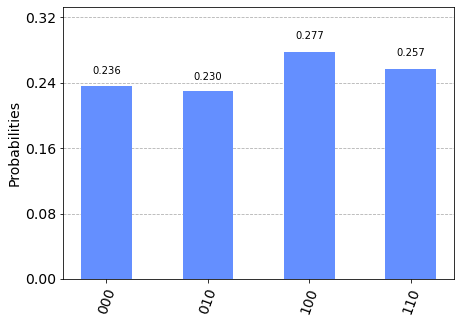

Total counts for qubit states are: {'100': 277, '000': 236, '110': 257, '010': 230} 

    Binary    Decimal      Phase   Fraction     Period
       100          4   0.500000        1/2          2
       000          0   0.000000          0          1
       110          6   0.750000        3/4          4
       010          2   0.250000        1/4          4


In [11]:
#Program 7.11 Run quantum period finding function with N=15
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from fractions import Fraction
sim = AerSimulator()
count_no=3
cir = qpf15(count_no=count_no,a=13)
job=execute(cir, backend=sim, shots=1000)
result = job.result()
counts = result.get_counts(cir)
display(plot_histogram(counts))
print('Total counts for qubit states are:',counts,'\n')
print('%10s %10s %10s %10s %10s' % ('Binary','Decimal','Phase','Fraction','Period'))  
for akey in counts.keys():
  dec=int(akey,base=2)
  phase=dec/(2**count_no)
  frac=Fraction(phase).limit_denominator(15)
  period=frac.denominator
  print('%10s %10d %10f %10s %10d' % (akey,dec,phase,frac,period))  